<a href="https://colab.research.google.com/github/nah90/CS767_GeneticAlgorithm/blob/main/CS767_hw5_Horak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 5- Genetic Algorithms (GAs)

In [ ]:
#INTENT: Import packages and setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import heapq
import random
import operator
from statistics import mean
from scipy.spatial import distance

#Boston 0, London 1, Mumbai 2, Shanghai 3
CITY_DICT = {0: 'Boston', 1: 'London', 2: 'Mumbai', 3: 'Shanghai'} #Set up dictionary representing destinations

tsp_matrix = np.asarray( #Create TSP adjacency matrix
    [
        [0.00, 3.0, 7.6, 7.8],
        [3.0, 0.00, 4.5, 5.7],
        [7.6, 4.5, 0.00, 3.1],
        [7.8, 5.7, 3.1, 0.00],
    ]
)

parent_one=[0,2,2,1] #Define parent one according to assignment
parent_two=[0,1,2,1] #Define parent two according to assignment


In [ ]:
#INTENT: Define 'evaluate' and 'dest_route' functions

def evaluate(list,matrix):
  '''Evaluate the distance of a traveling salesman problem route given a chromosome list
  and distance matrix

  Args:
    list(list): List representing travelign salesman problem route
    matrix(np.array): Distance matrix
  
  Returns:
    distance(float): Distance of input route per traveling salesman problem rules
  '''
  distance=0 #Set distance variable
  current_position=list[0] #Set current position to starting location
  distance_matrix=copy.copy(matrix) #Create a copy of the distance matrix
  for i in range(len(list)-1): #Loop through each interval (0-1, 1-2, 2-3)
    distance_array=distance_matrix[:,current_position] #Set distance array
    distance_matrix[current_position,:]=np.inf #Invalidate locations already visited 
    distance+=heapq.nsmallest(list[i+1],distance_array)[-1] #Add distance
    current_position=heapq.nsmallest(list[i+1], range(len(distance_array)), #Shift current position
                                     key=distance_array.__getitem__)[-1]
  distance+=matrix[current_position,list[0]] #After loop, go back to starting point
  distance=round(distance,1) #Round to 1 decimal place
  return distance #Return distance

def dest_route(list,matrix, dest_dict):
  '''State route taken on traveling salesman route given a chromosome list, distance matrix,
  and destination dictionary
  
  Args:
    list(list): List representing travelign salesman problem route
    matrix(np.array): Distance matrix
    dest_dict(dict): Dictionary with integer representation as keys and destinations as values

  Returns:
    route_list(list): List of destinations along route
  '''
  visited=[] #Create blank list visited
  current_position=list[0] #Set current position to starting location
  visited.append(current_position) #Add initial position to visited list
  distance_matrix=copy.copy(matrix) #Create a copy of the distance matrix
  for i in range(len(list)-1): #Loop through each interval (0-1, 1-2, 2-3)
    distance_array=distance_matrix[:,current_position] #Set distance array
    distance_matrix[current_position,:]=np.inf #Invalidate locations already visited 
    current_position=heapq.nsmallest(list[i+1], range(len(distance_array)), #Shift current position
                                     key=distance_array.__getitem__)[-1]
    visited.append(current_position) #Add current position to visited list
  visited.append(list[0]) #After loop, add starting point to visited list
  route_list=[] #Create blank list route_list
  for j in range(len(visited)-1): #Loop through visited list
    route_list.append(dest_dict.get(visited[j])) #Get value from key route_dict
  route_list.append(dest_dict.get(list[0])) #Add starting dest to end of route list
  return route_list #Return route list

In [ ]:
#Distance adjacency matrix
print(tsp_matrix)

[[0.  3.  7.6 7.8]
 [3.  0.  4.5 5.7]
 [7.6 4.5 0.  3.1]
 [7.8 5.7 3.1 0. ]]


In [ ]:
#List of cities in route for Section 2
dest_route([0,1,1,1], tsp_matrix, CITY_DICT)

['Boston', 'London', 'Mumbai', 'Shanghai', 'Boston']

In [ ]:
#INTENT: Create crossover function

def crossover(parent_one, parent_two, crossover_point):
  '''Create child of two parents with one point crossover given crossover point

  Args:
    parent_one(list): Chromosome list of parent one
    parent_two(list): Chromosome list of parent two
    crossover_point(int): Crossover point

  Returns:
    child(list): Chromosome list of resulting child
  '''
  child=[] #Create child
  child=parent_one[0:crossover_point+1]+parent_two[crossover_point+1:] #Assign genes to child
  return child #Return child

In [ ]:
#Crossover parent_one and parent_two given crossover_point 1
crossover(parent_one, parent_two, 1)

[0, 2, 2, 1]

In [ ]:
def mutate(chromosome, mutation_rate):
  '''Apply possible mutation with a percentage chance by mutation_rate for chromosome

  Args:
    chromosome(list): List representing chromosome to possibly mutate
    mutation_rate(float): Float of percentage a mutation occurs at a given gene per possible mutation

  Returns:
    chromosome(lis): List of chromosome with any mutations
  '''
  for i in range(len(chromosome)-1): #Loop through all mutable elements in child
    for j in range(len(chromosome)-i-1): #Loop through possible mutations
      if mutation_rate > random.random(): #If mutation fires
        if i==0: #Seperate initial index from rest
          current_value=chromosome[i] #Set current value
          value_list=list(range(0,len(chromosome))) #Create value list
          value_list.pop(current_value) #Remove current value from value list so it can't reappear in a mutation
          chromosome[i]=random.choice(value_list) #Set chromosome value randomly
        else:
          current_value=chromosome[i] #Set current value 
          value_list=list(range(1,len(chromosome)-i+1)) #Create value list
          value_list.pop(current_value-1) #Remove current value from value list so it can't reappear in a mutation
          chromosome[i]=random.choice(value_list) #Set chromosome value randomly
        break #If a mutation happens, disallow any further mutations on that element
  return chromosome #Return chromosome

In [ ]:
parent_one=[0,2,2,1] #Define parent one according to assignment
parent_two=[0,1,2,1] #Define parent two according to assignment
MUTATION_RATE=0.05 #Set mutation rate

child=crossover(parent_one, parent_two, 1) #Create a child from parent_one and parent_two given crossover point 1

mutate(child, MUTATION_RATE) #Mutate child

[0, 2, 2, 1]

In [ ]:
evaluate(parent_one,tsp_matrix) #Distance of route by parent_one

25.6

In [ ]:
evaluate(parent_two,tsp_matrix) #Distance of route by parent_two

19.4

In [ ]:
dest_route(parent_one,tsp_matrix, CITY_DICT) #List of destinations in route for parent_one

['Boston', 'Mumbai', 'London', 'Shanghai', 'Boston']

In [ ]:
dest_route(parent_two,tsp_matrix, CITY_DICT) #List of destinations in route for parent_two

['Boston', 'London', 'Shanghai', 'Mumbai', 'Boston']

In [ ]:
#INTENT: Define functions necessary to execute genetic algorithm

def create_random_routes(pop_size, dest_dict):
  '''Creates random chromosomes representing possible routes given pop_size and dest_dict

  Args:
    pop_size(int): Integer of number of chromosomes the algorithm will evaluate
    dest_dict(dict): Dictionary of route destinations
  Returns
    list_of_chromosomes(list): Returns list of list of chromosomes
  '''
  for i in range(pop_size): #Loop through pop_size
    new_list=[] #Create blank list new_list
    for j in range(len(dest_dict)): #Loop through length of dest_dict
      if j == 0: #For first element of new_list
        new_list.append(random.randint(0,len(dest_dict)-1)) #Add possible random value
      else: #For all other elements of new_list
        new_list.append(random.randint(1,len(dest_dict)-j)) #Add possible random value with decreasing upper bound by position in list
    list_of_chromosomes.append(new_list) #Add new_list to list_of_chromosomes
  return list_of_chromosomes #Return list of list

def process(list_of_chromosomes, matrix, mutation_rate):
  '''Process through the genetic algorithm given list of list of chromosomes, distance matrix, and mutation rate

  Args:
    list_of_chromosomes(list): List of list of chromosomes to process
    matrix(np.array): Distance matrix of destinations
    mutation_rate(float): Float of percentage a mutation occurs at a given gene per possible mutation
  
  Returns:
    child_list(list): List of list of chromosomes created via replication and mutation
  '''
  eval_list=[] #Create blank list eval_list
  for i in range(len(list_of_chromosomes)): #Loop through each list within list_of_chromosomes
    eval_list.append(evaluate(list_of_chromosomes[i],matrix)) #Evaluate distance of each chromosome
  eval_list=[number ** -2 for number in eval_list] #Raise all values in eval_list by -2
  #Negative will give more weight to lower distances, square will amplify importance of fitness
  list_of_mates=[] #Create blank list list_of_mates
  for j in range(len(list_of_chromosomes)): #Loop through each chromosome
    excluded_index=j #Mark current index
    choices=list_of_chromosomes[:excluded_index]+list_of_chromosomes[excluded_index+1:] #Create list of possible choices
    #Excluding the current index marked 'excluded_index'
    weights=eval_list[:excluded_index]+eval_list[excluded_index+1:] #Create list of evaluated distances
    #Excluding the current index marked 'excluded_index'
    item=random.choices(choices,weights) #Select a mate randomly with prospective mates weighted by fitness
    [item]=item #Remove layer of list 
    list_of_mates.append(item) #Add item to list_of_mates
  child_list=[] #Create blank list child_list
  for k in range(len(list_of_chromosomes)): #Loop through each chromosome
    crossover_point=random.randint(0,len(list_of_chromosomes)-1) #Assign crossover point randomly
    child=crossover(list_of_chromosomes[k], list_of_mates[k], crossover_point) #Create a child of each matched pair
    child=mutate(child, mutation_rate) #Mutate the child
    child_list.append(child) #Add child to child_list
  return(child_list) #Return child_list

def ga_performance(list_of_chromosomes,matrix):
  '''Calculate performance of genetic algorithm given list_of_chromosomes and distance matrix

  Args:
    list_of_chromosomes(list): List of list of chromosomes to process
    matrix(np.array): Distance matrix of destinations
  Returns:
    optimal_distance(float): Lowest (best) distance among all chromosomes
    average_distance(float): Average distance among all chromosomes
    percent_optimal(float): Percentage of chromosomes with optimal distance
  '''
  optimal=list_of_chromosomes[0] #Set optimal chromosome as first chromosome
  eval_list=[] #Create blank list eval_list
  for i in range(POP_SIZE): #Loop through population 
    if evaluate(list_of_chromosomes[i], matrix) < evaluate(optimal, matrix): #If distance of chromosome is better...
      optimal=list_of_chromosomes[i] #Set new optimal
    eval_list.append(evaluate(list_of_chromosomes[i],matrix)) #Evaluate distance of each chromosome
  counter=0 #Set counter
  for j in range(POP_SIZE): #Loop through population 
    if list_of_chromosomes[j]==optimal: #If distance is optimal...
      counter+=1 #Add to counter
  return evaluate(optimal,matrix), round(mean(eval_list),1), round((counter/POP_SIZE*100),1)
  #Return optimal distance, average distance, and percentage optimal distance


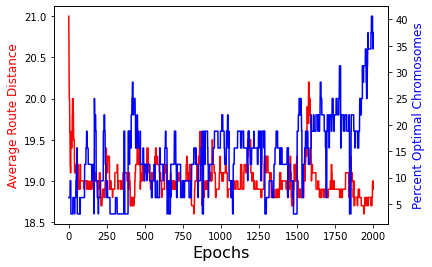

At completion, the algorithm found an optimal distance of 18.4
This value is the most optimal distance value the algorithm found as it executed.
At completion, the algorithm found an average distance of 18.9 among routes
At completion, 37.5 percent route gave an optimal distance of 18.4


In [ ]:
#INTENT: Execute genetic algorithm on given data

#Boston 0, London 1, Mumbai 2, Shanghai 3
CITY_DICT={0: 'Boston', 1: 'London', 2: 'Mumbai', 3: 'Shanghai'} #Set up dictionary representing destinations

#Set constants
POP_SIZE=32 #Set pop size
RANDOM_STATE=90 #Set random state for reproducibility
MUTATION_RATE=0.001 #Set mutation rate
NUMBER_EPOCHS=2000 #Define number of epochs

tsp_matrix = np.asarray( #Create TSP adjacency matrix
    [
        [0.00, 3.0, 7.6, 7.8],
        [3.0, 0.00, 4.5, 5.7],
        [7.6, 4.5, 0.00, 3.1],
        [7.8, 5.7, 3.1, 0.00],
    ]
)

#Set random state
random.seed(RANDOM_STATE) #Set seed as RANDOM_STATE

#Create chromosomes
list_of_chromosomes=[] #Create blank list list_of_chromosomes
list_of_chromosomes=create_random_routes(POP_SIZE, CITY_DICT) #Create random starting routes given data

#Create evaluation variables
avg_distance_list=[] #Create blank list avg_distance_list
opt_distance_list=[] #Create blank list opt_distance_list
epoch_optimal=evaluate(list_of_chromosomes[0],tsp_matrix) #Set initial optimum distance value as first chromosome of initial generation
epochs=list(range(1,NUMBER_EPOCHS+1)) #Create list of sequential numbers for each epoch

for k in range(1,NUMBER_EPOCHS+1): #Loop through each epoch
  list_of_chromosomes=process(list_of_chromosomes, tsp_matrix, MUTATION_RATE) #Process list_of_chromosomes
  #Apply selection of mates, replication with random crossover point, and mutation 
  optimal_distance, average_distance, percent_optimal=ga_performance(list_of_chromosomes, tsp_matrix)
  #Find measures of performance
  if optimal_distance < epoch_optimal: #If there is a new found optimal distance...
    epoch_optimal=optimal_distance
  avg_distance_list.append(average_distance) #Add average distance to average_distance list
  opt_distance_list.append(percent_optimal) #Add percent optimal to opt_distance_list

#Create double y axis plot showing 'Average Route Distance' and 'Percent Optimal Chromosomes'
fig,ax=plt.subplots()
ax.plot(epochs, avg_distance_list, color='red')
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Average Route Distance', color='red', fontsize=12)
ax2=ax.twinx()
ax2.plot(epochs, opt_distance_list, color="blue")
ax2.set_ylabel("Percent Optimal Chromosomes", color="blue", fontsize=12)
plt.show()

optimal_distance, average_distance,percent_optimal=ga_performance(list_of_chromosomes, tsp_matrix)
#Find measures of performance for final generation

print('At completion, the algorithm found an optimal distance of', optimal_distance)
if optimal_distance == epoch_optimal: #If no faster route was found previously...
  print('This value is the most optimal distance value the algorithm found as it executed.')
else:
  print('This value is less fit than the most optimal distance value the algorithm found,', epoch_optimal)
print('At completion, the algorithm found an average distance of', average_distance, 'among routes')
print('At completion,', percent_optimal, 'percent route gave an optimal distance of', optimal_distance)


In [ ]:
def ga_performance10(list_of_chromosomes,matrix):
  '''Calculate performance of genetic algorithm given list_of_chromosomes and distance matrix with 5% cushion

  Args:
    list_of_chromosomes(list): List of list of chromosomes to process
    matrix(np.array): Distance matrix of destinations
  Returns:
    optimal_distance(float): Lowest (best) distance among all chromosomes
    average_distance(float): Average distance among all chromosomes
    percent_optimal(float): Percentage of chromosomes with optimal distance
  '''
  optimal=list_of_chromosomes[0] #Set optimal chromosome as first chromosome
  eval_list=[] #Create blank list eval_list
  for i in range(POP_SIZE): #Loop through population 
    if evaluate(list_of_chromosomes[i], matrix) < evaluate(optimal, matrix): #If distance of chromosome is better...
      optimal=list_of_chromosomes[i] #Set new optimal
    eval_list.append(evaluate(list_of_chromosomes[i],matrix)) #Evaluate distance of each chromosome
  counter=0 #Set counter
  for j in range(POP_SIZE): #Loop through population 
    if evaluate(list_of_chromosomes[j],tsp_space_matrix)<=evaluate(optimal,tsp_space_matrix)*1.10: #If distance is optimal with 10% cushion...
      counter+=1 #Add to counter
  return evaluate(optimal,matrix), round(mean(eval_list),1), round((counter/POP_SIZE*100),1)
  #Return optimal distance, average distance, and percentage optimal distance

In [ ]:
#INTENT: Define my data and set-up constants

#Earth 0, Tattooine 1, Hoth 2, Coruscant 3, Naboo 4, Omicron Perseii VIII 5, Asgard 6, Laconia 7, Alpha Centauri 8, Vulcan 9
PLANET_DICT={0: 'Earth', 1: 'Tattooine', 2: 'Hoth', 3: 'Coruscant', 4: 'Naboo', 5: 'Omicron Perseii VIII',
           6: 'Asgard', 7: 'Laconia', 8: 'Alpha Centauri', 9: 'Vulcan'} #Set up dictionary representing destinations

#Set constants
POP_SIZE=64 #Set pop size
RANDOM_STATE=90 #Set random state for reproducibility
MUTATION_RATE=0.005 #Set mutation rate
NUMBER_EPOCHS=2000 #Define number of epochs

random.seed(RANDOM_STATE) #Set seed as RANDOM_STATE

distance_list=[] #Create blank list distance_list
for _ in range(len(PLANET_DICT)): #Loop through PLANET_DICT
    distance_list.append((10*random.random(), 10*random.random())) #Add random x,y coordinates
space_matrix = distance.cdist(distance_list, distance_list, 'euclidean') #Calculate distance between each destination
tsp_space_matrix = np.asarray(space_matrix) #Represent space_matrix as np.array

#Print space matrix
print(tsp_space_matrix)

[[0.         6.71745068 5.04242355 8.33308546 6.37884794 0.7156898
  5.30398554 9.81986001 7.01402417 6.06664424]
 [6.71745068 0.         2.32637332 3.67018413 3.58332656 6.41473385
  5.49829421 3.66333235 2.83990997 4.78657182]
 [5.04242355 2.32637332 0.         5.64081549 2.04444192 4.57665084
  3.28494339 5.98759208 2.13113264 2.83582005]
 [8.33308546 3.67018413 5.64081549 0.         7.23439537 8.33415028
  8.92479509 2.36497023 6.49915124 8.37233827]
 [6.37884794 3.58332656 2.04444192 7.23439537 0.         5.77401226
  2.39779712 7.01100962 1.11720589 1.33563105]
 [0.7156898  6.41473385 4.57665084 8.33415028 5.77401226 0.
  4.59920568 9.67112649 6.46872186 5.39304549]
 [5.30398554 5.49829421 3.28494339 8.92479509 2.39779712 4.59920568
  0.         9.12406657 3.51062336 1.19113134]
 [9.81986001 3.66333235 5.98759208 2.36497023 7.01100962 9.67112649
  9.12406657 0.         6.0307388  8.30723991]
 [7.01402417 2.83990997 2.13113264 6.49915124 1.11720589 6.46872186
  3.51062336 6.030738

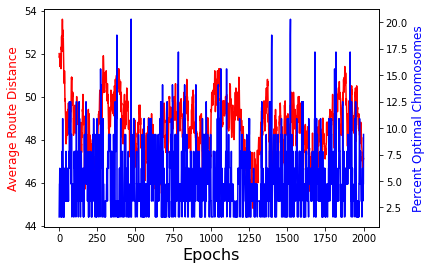

At completion, the algorithm found an optimal distance of 32.5
This value is less fit than the most optimal distance value the algorithm found, 27.8
At completion, the algorithm found an average distance of 47.1 among routes
At completion, 9.4 percent routes gave an optimal distance within 10% of 32.5


In [ ]:
#INTENT: Execute genetic algorithm on my data

#Set random state
random.seed(RANDOM_STATE)

#Create chromosomes
list_of_chromosomes=[] #Create blank list list_of_chromosomes
list_of_chromosomes=create_random_routes(POP_SIZE, PLANET_DICT) #Create random starting routes given data

#Create evaluation variables
avg_distance_list=[] #Create blank list avg_distance_list
opt_distance_list=[] #Create blank list opt_distance_list
epoch_optimal=evaluate(list_of_chromosomes[0],tsp_space_matrix) #Set initial optimum distance value as first chromosome of initial generation
epochs=list(range(1,NUMBER_EPOCHS+1)) #Create list of sequential numbers for each epoch

for k in range(1,NUMBER_EPOCHS+1): #Loop through each epoch
  list_of_chromosomes=process(list_of_chromosomes, tsp_space_matrix, MUTATION_RATE) #Process list_of_chromosomes
  #Apply selection of mates, replication with random crossover point, and mutation 
  optimal_distance, average_distance, percent_optimal=ga_performance10(list_of_chromosomes, tsp_space_matrix)
  #Find measures of performance
  if optimal_distance < epoch_optimal: #If there is a new found optimal distance...
    epoch_optimal=optimal_distance
  avg_distance_list.append(average_distance) #Add average distance to average_distance list
  opt_distance_list.append(percent_optimal) #Add percent optimal to opt_distance_list

#Create double y axis plot showing 'Average Route Distance' and 'Percent Optimal Chromosomes'
fig,ax=plt.subplots()
ax.plot(epochs, avg_distance_list, color='red')
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Average Route Distance', color='red', fontsize=12)
ax2=ax.twinx()
ax2.plot(epochs, opt_distance_list, color="blue")
ax2.set_ylabel("Percent Optimal Chromosomes", color="blue", fontsize=12)
plt.show()

optimal_distance, average_distance,percent_optimal=ga_performance10(list_of_chromosomes, tsp_space_matrix)
#Find measures of performance for final generation

print('At completion, the algorithm found an optimal distance of', optimal_distance)
if optimal_distance == epoch_optimal: #If no faster route was found previously...
  print('This value is the most optimal distance value the algorithm found as it executed.')
else:
  print('This value is less fit than the most optimal distance value the algorithm found,', epoch_optimal)
print('At completion, the algorithm found an average distance of', average_distance, 'among routes')
print('At completion,', percent_optimal, 'percent routes gave an optimal distance within 10% of', optimal_distance)

##Section 8 Traveling Salesman Problem Genetic Algorithm Implementation By Eric Stoltz

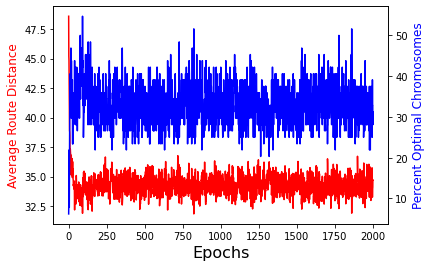

At completion, the algorithm found an optimal distance of 27.8
This value is the most optimal distance value the algorithm found as it executed.
At completion, the algorithm found an average distance of 34.7 among routes
At completion, 31.2 percent routes gave an optimal distance within 10% of 27.8


In [ ]:
#INTENT: Define my data and run TSP GA implementation by Eric Stoltz

#Earth 0, Tattooine 1, Hoth 2, Coruscant 3, Naboo 4, Omicron Perseii VIII 5, Asgard 6, Laconia 7, Alpha Centauri 8, Vulcan 9
PLANET_DICT={0: 'Earth', 1: 'Tattooine', 2: 'Hoth', 3: 'Coruscant', 4: 'Naboo', 5: 'Omicron Perseii VIII',
           6: 'Asgard', 7: 'Laconia', 8: 'Alpha Centauri', 9: 'Vulcan'} #Set up dictionary representing destinations

#Set constants
POP_SIZE=64 #Set pop size
RANDOM_STATE=90 #Set random state for reproducibility
MUTATION_RATE=0.005 #Set mutation rate
NUMBER_EPOCHS=2000 #Define number of epochs

random.seed(RANDOM_STATE) #Set seed as RANDOM_STATE

distance_list=[] #Create blank list distance_list
for _ in range(len(PLANET_DICT)): #Loop through PLANET_DICT
    distance_list.append(City(10*random.random(), 10*random.random())) #Add random x,y coordinates


###Eric Stoltz implementation
#https://towardsdatascience.com/evolution-of-a-salesman-a-complete-genetic-algorithm-tutorial-for-python-6fe5d2b3ca35
#https://github.com/ezstoltz/genetic-algorithm/blob/master/genetic_algorithm_TSP.ipynb


##Create necessary classes and functions

#Create class to handle "cities"

class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

#Create a fitness function

class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

##Create our initial population

#Route generator

def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

#Create first "population" (list of routes)

def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

##Create the genetic algorithm

#Rank individuals

def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

#Create a selection function that will be used to make the list of parent routes

def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

#Create mating pool

def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

#Create a crossover function for two parents to create one child

def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

#Create function to run crossover over full mating pool

def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

#Create function to mutate a single route

def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

#Create function to run mutation over entire population

def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

#Put all steps together to create the next generation

def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

#Final step: create the genetic algorithm

def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

##Plot the progress

#Updated slightly (and comment where I made changes) to plot the evaluation the same way as above
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population) #Establish population
    avg_distance_list=[] #Create blank list avg_distance_list
    opt_distance_list=[] #Create blank list opt_distance_list
    epoch_optimal=(1/rankRoutes(pop)[0][1]) #Set initial optimum distance value as first chromosome of initial generation
    epochs=list(range(1,NUMBER_EPOCHS+1)) #Create list of sequential numbers for each epoch   
    progress=[] #Create blank list progress
    
    for i in range(0, generations): #Loop through each generation
        pop = nextGeneration(pop, eliteSize, mutationRate) #Create new population for next generation
        prog_list=rankRoutes(pop) #List of routes ranked by optimal distance
        progress.append(1/prog_list[0][1]) #Add best distance value to progress
        flat_list=[item for sublist in prog_list for item in sublist][1::2] #Create flat list of prog_list
        counter=0 #Set counter
        for j in range(popSize): #Loop through population 
          if 1/flat_list[j]<=1/prog_list[0][1]*1.10: #If distance is optimal with 10% cushion...
            counter+=1 #Add to counter
        
        #Find measures of performance
        if 1/prog_list[0][1] < epoch_optimal: #If there is a new found optimal distance...
          epoch_optimal=1/prog_list[0][1]
        avg_distance_list.append(1/list(map(mean, zip(*prog_list)))[1]) #Add average distance to average_distance list
        opt_distance_list.append(round((counter/popSize*100),1)) #Add percent optimal to opt_distance_list

    #Create double y axis plot showing 'Average Route Distance' and 'Percent Optimal Chromosomes'
    fig,ax=plt.subplots()
    ax.plot(epochs, avg_distance_list, color='red')
    ax.set_xlabel('Epochs', fontsize=16)
    ax.set_ylabel('Average Route Distance', color='red', fontsize=12)
    ax2=ax.twinx()
    ax2.plot(epochs, opt_distance_list, color="blue")
    ax2.set_ylabel("Percent Optimal Chromosomes", color="blue", fontsize=12)
    plt.show()

    percent_optimal=round(opt_distance_list[-1],1) #Set percent_optimal for last generation
    average_distance=round(avg_distance_list[-1],1) #Set average_distance for last generation
    optimal_distance=round(progress[-1],1) #Set optimal_distance for last generation

    print('At completion, the algorithm found an optimal distance of', optimal_distance)
    if abs(optimal_distance-epoch_optimal)>0.01: #If no faster route was found previously...
      print('This value is the most optimal distance value the algorithm found as it executed.')
    else:
      print('This value is less fit than the most optimal distance value the algorithm found,', round(epoch_optimal,1))
    print('At completion, the algorithm found an average distance of', average_distance, 'among routes')
    print('At completion,', percent_optimal, 'percent routes gave an optimal distance within 10% of', optimal_distance)

#Run algorithm
geneticAlgorithmPlot(population=distance_list, popSize=POP_SIZE, eliteSize=POP_SIZE//5, mutationRate=MUTATION_RATE, generations=NUMBER_EPOCHS)

##Appendix E

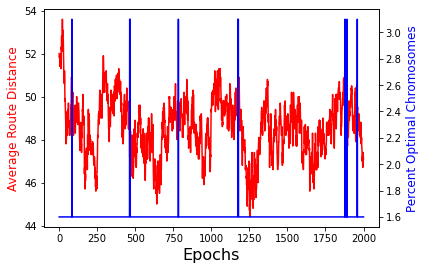

At completion, the algorithm found an optimal distance of 32.5
This value is less fit than the most optimal distance value the algorithm found, 27.8
At completion, the algorithm found an average distance of 47.1 among routes
At completion, 1.6 percent route gave an optimal distance of 32.5


In [ ]:
#INTENT: Execute genetic algorithm on my data (Appendix E)

#Set random state
random.seed(RANDOM_STATE)

#Create chromosomes
list_of_chromosomes=[] #Create blank list list_of_chromosomes
list_of_chromosomes=create_random_routes(POP_SIZE, PLANET_DICT) #Create random starting routes given data

#Create evaluation variables
avg_distance_list=[] #Create blank list avg_distance_list
opt_distance_list=[] #Create blank list opt_distance_list
epoch_optimal=evaluate(list_of_chromosomes[0],tsp_space_matrix) #Set initial optimum distance value as first chromosome of initial generation
epochs=list(range(1,NUMBER_EPOCHS+1)) #Create list of sequential numbers for each epoch

for k in range(1,NUMBER_EPOCHS+1): #Loop through each epoch
  list_of_chromosomes=process(list_of_chromosomes, tsp_space_matrix, MUTATION_RATE) #Process list_of_chromosomes
  #Apply selection of mates, replication with random crossover point, and mutation 
  optimal_distance, average_distance, percent_optimal=ga_performance(list_of_chromosomes, tsp_space_matrix)
  #Find measures of performance
  if optimal_distance < epoch_optimal: #If there is a new found optimal distance...
    epoch_optimal=optimal_distance
  avg_distance_list.append(average_distance) #Add average distance to average_distance list
  opt_distance_list.append(percent_optimal) #Add percent optimal to opt_distance_list

#Create double y axis plot showing 'Average Route Distance' and 'Percent Optimal Chromosomes'
fig,ax=plt.subplots()
ax.plot(epochs, avg_distance_list, color='red')
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Average Route Distance', color='red', fontsize=12)
ax2=ax.twinx()
ax2.plot(epochs, opt_distance_list, color="blue")
ax2.set_ylabel("Percent Optimal Chromosomes", color="blue", fontsize=12)
plt.show()

optimal_distance, average_distance,percent_optimal=ga_performance(list_of_chromosomes, tsp_space_matrix)
#Find measures of performance for final generation

print('At completion, the algorithm found an optimal distance of', optimal_distance)
if optimal_distance == epoch_optimal: #If no faster route was found previously...
  print('This value is the most optimal distance value the algorithm found as it executed.')
else:
  print('This value is less fit than the most optimal distance value the algorithm found,', epoch_optimal)
print('At completion, the algorithm found an average distance of', average_distance, 'among routes')
print('At completion,', percent_optimal, 'percent route gave an optimal distance of', optimal_distance)

##Appendix G

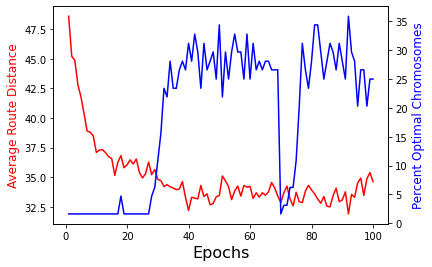

At completion, the algorithm found an optimal distance of 27.8
This value is the most optimal distance value the algorithm found as it executed.
At completion, the algorithm found an average distance of 34.6 among routes
At completion, 25.0 percent route gave an optimal distance of 27.8


In [ ]:
#INTENT: Define my data and run TSP GA implementation by Eric Stoltz (Appendix G)

#Earth 0, Tattooine 1, Hoth 2, Coruscant 3, Naboo 4, Omicron Perseii VIII 5, Asgard 6, Laconia 7, Alpha Centauri 8, Vulcan 9
PLANET_DICT={0: 'Earth', 1: 'Tattooine', 2: 'Hoth', 3: 'Coruscant', 4: 'Naboo', 5: 'Omicron Perseii VIII',
           6: 'Asgard', 7: 'Laconia', 8: 'Alpha Centauri', 9: 'Vulcan'} #Set up dictionary representing destinations

#Set constants
POP_SIZE=64 #Set pop size
RANDOM_STATE=90 #Set random state for reproducibility
MUTATION_RATE=0.005 #Set mutation rate
NUMBER_EPOCHS=100 #Define number of epochs

random.seed(RANDOM_STATE) #Set seed as RANDOM_STATE

distance_list=[] #Create blank list distance_list
for _ in range(len(PLANET_DICT)): #Loop through PLANET_DICT
    distance_list.append(City(10*random.random(), 10*random.random())) #Add random x,y coordinates

#Updated Genetic Algorithm Plot function
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population) #Establish population
    avg_distance_list=[] #Create blank list avg_distance_list
    opt_distance_list=[] #Create blank list opt_distance_list
    epoch_optimal=(1/rankRoutes(pop)[0][1]) #Set initial optimum distance value as first chromosome of initial generation
    epochs=list(range(1,NUMBER_EPOCHS+1)) #Create list of sequential numbers for each epoch   
    progress=[] #Create blank list progress
    
    for i in range(0, generations): #Loop through each generation
        pop = nextGeneration(pop, eliteSize, mutationRate) #Create new population for next generation
        prog_list=rankRoutes(pop) #List of routes ranked by optimal distance
        progress.append(1/prog_list[0][1]) #Add best distance value to progress
        flat_list=[item for sublist in prog_list for item in sublist][1::2] #Create flat list of prog_list
        counter=0 #Set counter
        for j in range(popSize): #Loop through population 
          if 1/flat_list[j]<=1/prog_list[0][1]: #If distance is optimal...
            counter+=1 #Add to counter
        
        #Find measures of performance
        if 1/prog_list[0][1] < epoch_optimal: #If there is a new found optimal distance...
          epoch_optimal=1/prog_list[0][1]
        avg_distance_list.append(1/list(map(mean, zip(*prog_list)))[1]) #Add average distance to average_distance list
        opt_distance_list.append(round((counter/popSize*100),1)) #Add percent optimal to opt_distance_list

    #Create double y axis plot showing 'Average Route Distance' and 'Percent Optimal Chromosomes'
    fig,ax=plt.subplots()
    ax.plot(epochs, avg_distance_list, color='red')
    ax.set_xlabel('Epochs', fontsize=16)
    ax.set_ylabel('Average Route Distance', color='red', fontsize=12)
    ax2=ax.twinx()
    ax2.plot(epochs, opt_distance_list, color="blue")
    ax2.set_ylabel("Percent Optimal Chromosomes", color="blue", fontsize=12)
    plt.show()

    percent_optimal=round(opt_distance_list[-1],1) #Set percent_optimal for last generation
    average_distance=round(avg_distance_list[-1],1) #Set average_distance for last generation
    optimal_distance=round(progress[-1],1) #Set optimal_distance for last generation

    print('At completion, the algorithm found an optimal distance of', optimal_distance)
    if abs(optimal_distance-epoch_optimal)>0.01: #If no faster route was found previously...
      print('This value is the most optimal distance value the algorithm found as it executed.')
    else:
      print('This value is less fit than the most optimal distance value the algorithm found,', round(epoch_optimal,1))
    print('At completion, the algorithm found an average distance of', average_distance, 'among routes')
    print('At completion,', percent_optimal, 'percent route gave an optimal distance of', optimal_distance)

#Run algorithm
geneticAlgorithmPlot(population=distance_list, popSize=POP_SIZE, eliteSize=POP_SIZE//5, mutationRate=MUTATION_RATE, generations=NUMBER_EPOCHS)